In [ ]:
#Libraries

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
df=pd.DataFrame({ 'x1':[12,20,28,18,29,33,24,45,43,51,52,55,53,54,61,64,69,52,6,62,45,60,59,8], 
                 'x2':[39,36,30,52,54,46,55,59,63,70,66,63,58,14,8,19,7,24,77,65,80,4,72,45]})

In [ ]:
df.head()

,x1,x2
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      24 non-null     int64
 1   x2      24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [ ]:
df.describe()

,x1,x2
count,24.000000,24.000000
mean,41.791667,46.083333
std,19.226294,23.381369
min,6.000000,4.000000
25%,27.000000,28.500000
50%,48.000000,53.000000
75%,56.000000,63.500000
max,69.000000,80.000000


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3, random_state= 4)  #No of clusters

In [ ]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4, tol=0.0001, verbose=0)

In [ ]:
# Final Centroid Points or values
km.cluster_centers_

array([[19.77777778, 48.22222222],
       [60.        , 12.66666667],
       [51.66666667, 66.22222222]])

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       2, 0], dtype=int32)

In [ ]:
#Adding the created label from model to the data frame

df['K mean predicted labels'] = km.labels_

In [ ]:
df.head()

,x1,x2,K mean predicted labels
0,12,39,0
1,20,36,0
2,28,30,0
3,18,52,0
4,29,54,0


In [ ]:
labels = km.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       2, 0], dtype=int32)

# Visualization

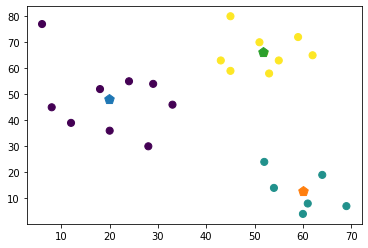

In [ ]:
plt.scatter(df['x1'], df['x2'],50, labels)

for i in km.cluster_centers_:
  plt.scatter(i[0],i[1],100, marker = 'p')
plt.show()

# When there are more than 2 features
#x1,x2,x3,x4,....xn for that we can pick any 2 features

# Elbow Method

In [ ]:
wss = []
cluster_range = range(1,10)

for k in cluster_range:
  km = KMeans(n_clusters=k)
  km.fit(df)
  inertia = km.inertia_
  wss.append(inertia)

print(wss)

[21093.791666666668, 9508.055555555557, 3456.0, 2572.688888888889, 1742.6388888888887, 1470.4166666666665, 1193.4166666666665, 894.7499999999999, 685.4166666666666]


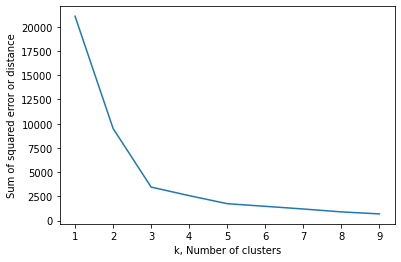

In [ ]:
plt.xlabel('k, Number of clusters')
plt.ylabel('Sum of squared error or distance')

plt.plot(cluster_range, wss)

plt.show()

# SEABORN

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns

sns.__version__

'0.11.1'

In [ ]:
# Required libraries for seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [ ]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

# Draw bar plots

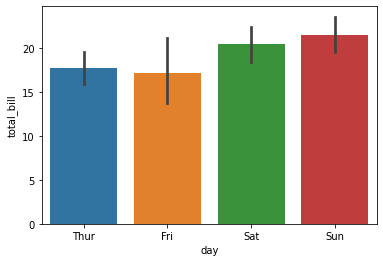

In [ ]:
sns.barplot(x = 'day', y = 'total_bill', data=tips)

plt.show()

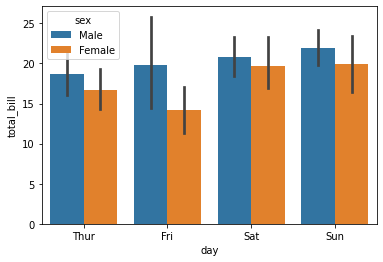

In [ ]:
sns.barplot(x = 'day', y = 'total_bill', hue = 'sex', data=tips)

plt.show()

# Palette Attribute

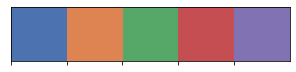

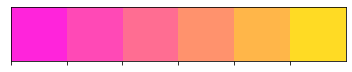

In [ ]:
sns.palplot(sns.color_palette('deep',5))

sns.palplot(sns.color_palette('spring',6))


# Creating a color palettes

In [ ]:
my = ['red', 'green', 'blue']

sns.set_palette(my)

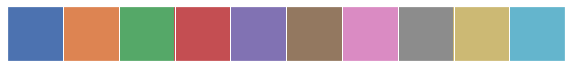

In [ ]:
sns.palplot(sns.color_palette())

In [ ]:
sns.set(style='darkgrid')

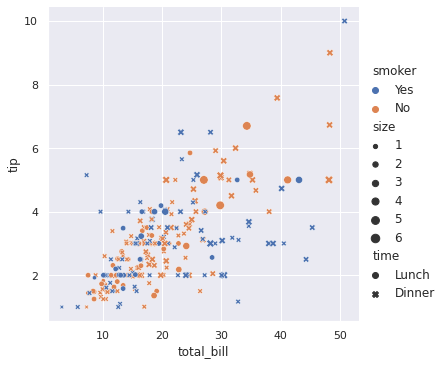

In [ ]:
#relational plot with scatter plot 
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips,style="time", size = 'size')